# KNN with PCA ML Model 

In [37]:
# Importing libaries
import pandas as pd
import numpy as nd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
# importing the dataset
df = pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [39]:
# To print the first 5 rows from the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
# To know the data types of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [41]:
# To findout information about missing values from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
# To find the sum of missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Preprocessing

In [43]:
# Separating Dataset
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# printing data shape
print('Dimensionality of x is: ',x.shape)
print('Dimensionality of y is: ',y.shape)

Dimensionality of x is:  (303, 13)
Dimensionality of y is:  (303,)


In [44]:
# Applying Standardscaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


# Using None as n_components parameter

In [45]:
# applying PCA on x to reduce the dimensions
from sklearn.decomposition import PCA
pca =PCA(n_components=None)
# Since we donot know the percentage variance explained by the columns 
# we use the None as the values for the n_components parameter
x = pca.fit_transform(x)
ev = pca.explained_variance_ratio_
print(ev)

[0.21254053 0.11820708 0.09406418 0.09085735 0.07861281 0.07461661
 0.06636692 0.05968811 0.05530196 0.04781309 0.04077729 0.03254941
 0.02860467]


# Taking n_components as 2

In [46]:
# applying PCA on x to reduce the dimensions
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['PC1','PC2','PC3','PC4'])


In [47]:
# Final Df
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,target
0,0.624111,2.321270,2.474673,2.676239,1
1,-0.455988,-0.957351,1.139595,2.426838,1
2,-1.828805,0.042885,-0.452229,0.406415,1
3,-1.716006,-0.495337,0.030631,-0.112162,1
4,-0.371356,0.301156,-2.841069,-0.809042,1


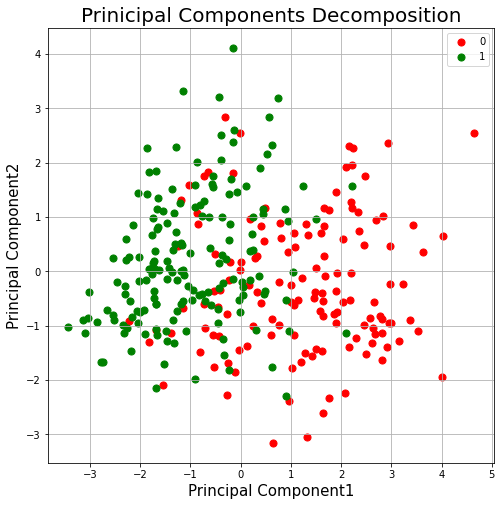

In [12]:
#Visualizing
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component1', fontsize =15)
ax.set_ylabel('Principal Component2', fontsize = 15)
ax.set_title('Prinicipal Components Decomposition', fontsize = 20)
targets = [0,1]
colors = ['r','g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
    finalDf.loc[indicesToKeep,'PC2'],
    c = color,
    s = 50)
ax.legend(targets)
ax.grid()

In [48]:
x = pca.fit_transform(x)
ev = pca.explained_variance_ratio_
print(ev)

[0.21254053 0.11820708 0.09406418 0.09085735]


# KNN Model

In [49]:
#count the number of patients who have heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

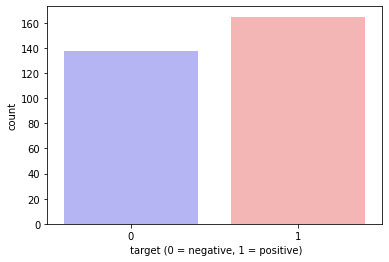

In [50]:
#count visualization
sns.countplot(x="target", data=df, palette="bwr")
plt.xlabel(" target (0 = negative, 1 = positive)")
plt.show()

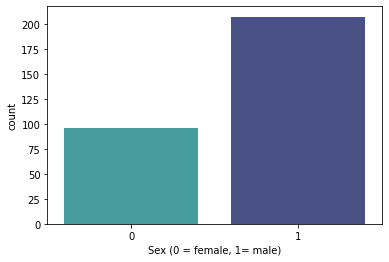

In [51]:
# classify target variable between male and female and visualize the result
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

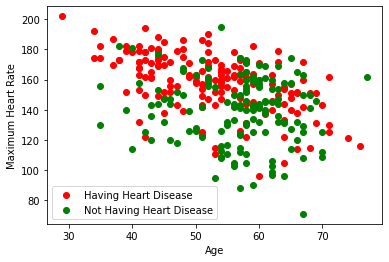

In [52]:
#visualizing relation between "Maximum Heart Rate" and "Age"
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c = 'green')
plt.legend(["Having Heart Disease", "Not Having Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [53]:
#splitting x and y into training and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=0)

# Creating and Training KNN Model

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=7)

In [20]:
#Predicting from the model
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = knn.predict(x_te)

# To find accuracy using accuracy_score 
acc = accuracy_score(y_te,y_pred)
print(acc)

#Plotting confusion matrix to check accuracy
cm = confusion_matrix(y_te, y_pred)
print(cm)

0.8289473684210527
[[23 10]
 [ 3 40]]


In [21]:
#Plotting confusion matrix to check accuracy
cm = confusion_matrix(y_te, y_pred)
print(cm)

[[23 10]
 [ 3 40]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

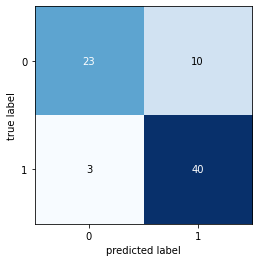

In [22]:
# plotting the confusion matrix and visualization test data output
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)

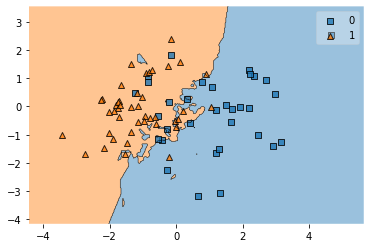

In [23]:
plot_decision_regions(X=x_te,y=y_te,clf=knn)
plt.show()

In [24]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.80      0.93      0.86        43

    accuracy                           0.83        76
   macro avg       0.84      0.81      0.82        76
weighted avg       0.84      0.83      0.83        76



#  cross_validation_accuracy with k =7

In [25]:
#k- fold cross_validation (cv=10) with k=7
#Instantaneous Model
classifier = KNeighborsClassifier(n_neighbors = 7)
score = cross_val_score(classifier, x , y , cv=10 , scoring = 'accuracy')
print(score)
print(score.mean())

[0.80645161 0.67741935 0.87096774 0.83333333 0.8        0.9
 0.86666667 0.8        0.7        0.83333333]
0.8088172043010754


# To findout K value

In [26]:
#Searching optimal value of k
k_range = range(1,25)
k_scores = []
k_score = []
#looping through all values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=15, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print(scores.mean())

[0.69, 0.674126984126984, 0.748888888888889, 0.7296825396825397, 0.7822222222222223, 0.7725396825396825, 0.7953968253968254, 0.8025396825396826, 0.8053968253968254, 0.7987301587301588, 0.8087301587301589, 0.8187301587301588, 0.8219047619047618, 0.8122222222222223, 0.8122222222222224, 0.8090476190476191, 0.8123809523809524, 0.8155555555555557, 0.8253968253968255, 0.818888888888889, 0.8253968253968255, 0.8120634920634922, 0.8220634920634922, 0.8155555555555556]
0.8155555555555556


Text(0, 0.5, 'Cross_Validated_Accuracy')

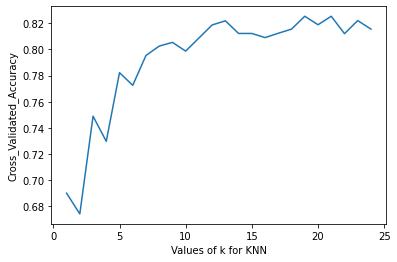

In [27]:
#plotting the value of accuracy vs k
plt.plot(k_range, k_scores)
plt.xlabel('Values of k for KNN')
plt.ylabel('Cross_Validated_Accuracy')

# Optimum KNN Model

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=19,metric='minkowski',p=2)
knn.fit(x_tr,y_tr)
y_pred = knn.predict(x_te)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

# Accuracy using accuracy_score 

In [56]:
# To obtain  the accuracy 
# normalize by default is true i.e., to return fraction of correctly classified samples(float)
acc = accuracy_score(y_te,y_pred, normalize = True)
print(acc)

# 'normalize = false' returns the no. of correctly classified samples(int)
acc1 = accuracy_score(y_te,y_pred, normalize= False)
print(acc1)

0.8552631578947368
65


In [57]:
#Predicting from the model
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = knn.predict(x_te)

# To find accuracy using accuracy_score 
# normalize by default is true i.e., to return fraction of correctly classified samples(float)
acc = accuracy_score(y_te,y_pred,normalize = True)
print(acc)

# 'normalize = false' returns the no. of correctly classified samples(int)
acc1 = accuracy_score(y_te,y_pred, normalize= False)
print(acc1)

#Plotting confusion matrix to check accuracy
cm = confusion_matrix(y_te, y_pred)
print(cm)

0.8552631578947368
65
[[24  9]
 [ 2 41]]


In [58]:
#Plotting confusion matrix
cm = confusion_matrix(y_te, y_pred)
print(cm)

[[24  9]
 [ 2 41]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

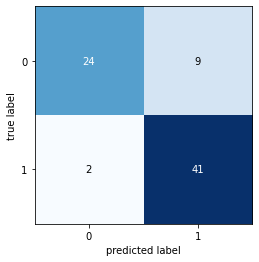

In [59]:
# plotting the confusion matrix and visualization test data output
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)

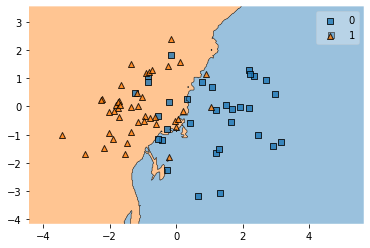

In [34]:
plot_decision_regions(X=x_te,y=y_te,clf=knn)
plt.show()

In [35]:
#Evaluating the Algorithm
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



# cross_validation_accuracy

In [36]:
#10- fold cross_validation (cv=15) with k=21
#Instantaneous Model
classifier = KNeighborsClassifier(n_neighbors = 21)
score = cross_val_score(classifier, x , y , cv=10 , scoring = 'accuracy')
print(score)
print(score.mean())

[0.90322581 0.74193548 0.83870968 0.9        0.83333333 0.86666667
 0.9        0.8        0.7        0.83333333]
0.8317204301075269
